In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv("titanic.csv")

In [40]:
#df.head()

In [41]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [42]:
df.drop(['name','sibsp', 'parch','ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [43]:
df.head()

,pclass,survived,gender,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [44]:
X = df.drop('survived', axis='columns')
y = df.survived

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'male'

In [48]:
dummies = pd.get_dummies(df['gender'], drop_first=True).astype(int)

In [49]:
#dummies
df = pd.concat([df, dummies], axis=1)
df.drop(['gender'], inplace = True, axis=1)
df.head()

,pclass,survived,age,male
0,1,1,29.0000,0
1,1,1,0.9167,1
2,1,0,2.0000,0
3,1,0,30.0000,1
4,1,0,25.0000,0


In [50]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Errors left on purpose

ValueError: could not convert string to float: 'male'

In [51]:
X = df.drop('survived', axis='columns')
y = df.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df.columns[df.isna().any()]

<Axes: >

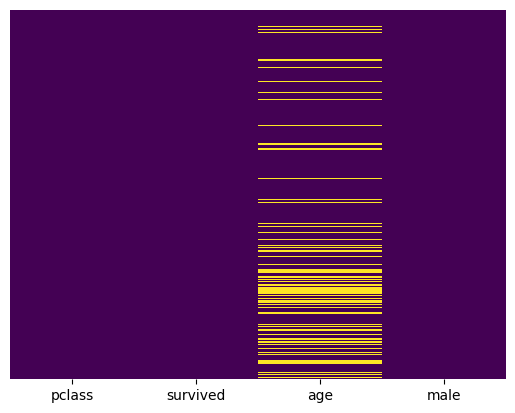

In [53]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

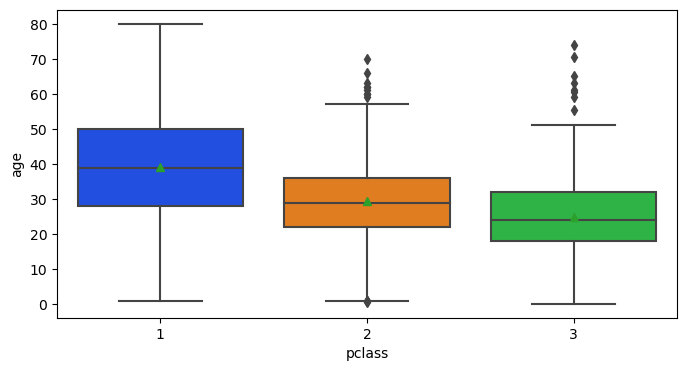

In [54]:
plt.figure(figsize=(8,4))
boxplot = sns.boxplot(x='pclass', y='age', data=df, palette='bright', showmeans=True)

In [55]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [56]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

<Axes: >

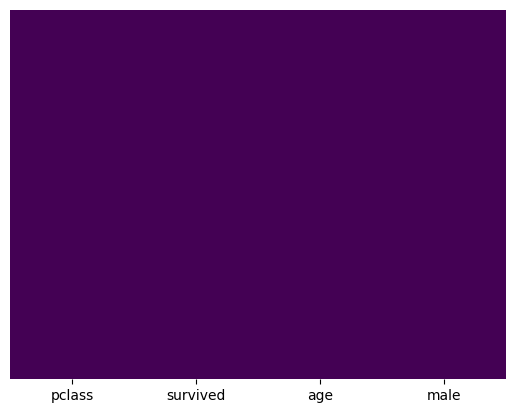

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [58]:
X = df.drop('survived', axis='columns')
y = df.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7592592592592593